<a href="https://colab.research.google.com/github/viviakemik/spark/blob/main/data-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.udacity.com/course/learn-spark-at-udacity--ud2002

In [2]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 41 kB/s 
     |████████████████████████████████| 198 kB 54.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=8fd13ccbcf45a122a61ca35cadedb65a5f057d84adbd34f5a0540ebc7c9ddf7e
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


# **Maps**
In Spark, maps take data as input and then transform that data with whatever function you put in the map. They are like directions for the data telling how each input should get to the output.

In [3]:
import pyspark
sc = pyspark.SparkContext(appName="maps_and_lazy_evaluation_example")

log_of_songs = [
        "Despacito",
        "Nice for what",
        "No tears left to cry",
        "Despacito",
        "Havana",
        "In my feelings",
        "Nice for what",
        "despacito",
        "All the stars"
]

# parallelize the log_of_songs to use with Spark
distributed_song_log = sc.parallelize(log_of_songs)

Spark Context is the main entry point for Spark functionality and connects the cluster with the application

In [4]:
def convert_song_to_lowercase(song):
    return song.lower()

convert_song_to_lowercase("Havana")

'havana'

In [5]:
distributed_song_log.map(convert_song_to_lowercase)

PythonRDD[1] at RDD at PythonRDD.scala:53

* this code cell ran quite quickly. This is because of lazy evaluation. Spark does not actually execute the map step unless it needs to.
* RDDs: fault-tolerant datasets distributed across a cluster
* To get Spark to actually run the map step, you need to use an "action"

In [6]:
distributed_song_log.map(convert_song_to_lowercase).collect()

['despacito',
 'nice for what',
 'no tears left to cry',
 'despacito',
 'havana',
 'in my feelings',
 'nice for what',
 'despacito',
 'all the stars']

Note as well that Spark is not changing the original data set

In [7]:
distributed_song_log.collect()

['Despacito',
 'Nice for what',
 'No tears left to cry',
 'Despacito',
 'Havana',
 'In my feelings',
 'Nice for what',
 'despacito',
 'All the stars']

In [8]:
print(type(distributed_song_log.collect()))

<class 'list'>


You can also use anonymous (lambda) functions as well as built-in Python functions like string.lower()

In [9]:
distributed_song_log.map(lambda song: song.lower()).collect()

['despacito',
 'nice for what',
 'no tears left to cry',
 'despacito',
 'havana',
 'in my feelings',
 'nice for what',
 'despacito',
 'all the stars']

# **Reading and Writing Data with Spark**

* To read dataframes we need to use SparkSession

In [10]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [11]:
spark = SparkSession \
    .builder \
    .appName("Our first Python Spark SQL example") \
    .getOrCreate()

In [12]:
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1636211353086'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.startTime', '1636211351180'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'maps_and_lazy_evaluation_example'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.host', 'a28b1161b8a2'),
 ('spark.driver.port', '44287'),
 ('spark.sql.warehouse.dir', 'file:/content/spark-warehouse'),
 ('spark.ui.showConsoleProgress', 'true')]

In [13]:
spark

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
path = "drive/MyDrive/Github/spark/data/sparkify_log_small.json"
user_log = spark.read.json(path)

In [16]:
print(type(user_log))

<class 'pyspark.sql.dataframe.DataFrame'>


In [17]:
user_log.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [18]:
user_log.describe()

DataFrame[summary: string, _corrupt_record: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [19]:
user_log.show(n=1)

+---------------+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|_corrupt_record|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+---------------+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|           null|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+---------------+-------------+---------+---------+------+-------------+--------+---

In [20]:
user_log.take(5)

[Row(_corrupt_record=None, artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(_corrupt_record=None, artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(_corrupt_record=None, artist='Cob

In [21]:
out_path = "drive/MyDrive/Github/spark/data/sparkify_log_small.csv"

In [27]:
user_log.write.save(out_path, format="csv", header=True)

In [28]:
user_log_2 = spark.read.csv(out_path, header=True)

In [29]:
user_log_2.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [30]:
user_log_2.take(2)

[Row(_corrupt_record='"",Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"\\"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36\\"",1046', artist=None, auth='Showaddywaddy', firstName='Logged In', gender='Kenneth', itemInSession='M', lastName='112', length='Matthews', level='232.93342', location='paid', method='Charlotte-Concord-Gastonia, NC-SC', page='PUT', registration='NextSong', sessionId='1509380319284', song='5132', status='Christmas Tears Will Fall', ts='200', userAgent='1513720872284', userId='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"'),
 Row(_corrupt_record='"",Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1512718541284,5027,Cheryl Tweedy,200,1513720878284,"\\"Mozilla/5.0 (Windows NT 6.1)

In [31]:
user_log_2.select("userID").show()

+--------------------+
|              userID|
+--------------------+
|"Mozilla/5.0 (Win...|
|"Mozilla/5.0 (Win...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Win...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Mac...|
|Mozilla/5.0 (Wind...|
|Mozilla/5.0 (comp...|
|"Mozilla/5.0 (Win...|
|"Mozilla/5.0 (Win...|
|Mozilla/5.0 (comp...|
|"Mozilla/5.0 (Win...|
|"Mozilla/5.0 (Mac...|
|Mozilla/5.0 (Wind...|
|"Mozilla/5.0 (Mac...|
|"Mozilla/5.0 (Win...|
|                null|
|"Mozilla/5.0 (Win...|
|"Mozilla/5.0 (Mac...|
+--------------------+
only showing top 20 rows



In [32]:
user_log_2.take(1)

[Row(_corrupt_record='"",Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1509380319284,5132,Christmas Tears Will Fall,200,1513720872284,"\\"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36\\"",1046', artist=None, auth='Showaddywaddy', firstName='Logged In', gender='Kenneth', itemInSession='M', lastName='112', length='Matthews', level='232.93342', location='paid', method='Charlotte-Concord-Gastonia, NC-SC', page='PUT', registration='NextSong', sessionId='1509380319284', song='5132', status='Christmas Tears Will Fall', ts='200', userAgent='1513720872284', userId='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"')]

# **Data Wrangling with DataFrames**

## **General functions**

* select()
* filter(): filters rows using the given condition
* where(): is just an alias for filter()
* groupBy(), sort()
* dropDuplicates()
* withColumn(): returns a new DataFrame by adding a column or replacing the existing column that has the same name. The first parameter is the name of the new column, the second is an expression of how to compute it.

## **Aggregate functions**
* count(), countDistinct(), avg(), max(), min()
* groupBy() and agg(). For example agg({"salary": "avg", "age": "max"})

## **User defined functions (UDF)**
* In Spark SQL we can define our own functions with the udf method from the pyspark.sql.functions module

## **Window functions**

For further information see the [Spark SQL, DataFrames and Datasets Guide](https://spark.apache.org/docs/latest/sql-programming-guide.html) and the [Spark Python API Docs](https://spark.apache.org/docs/latest/api/python/index.html).

In [33]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
user_log.describe().show()

+-------+--------------------+-------+----------+---------+------+------------------+--------+------------------+-----+------------+------+-------+--------------------+------------------+--------+------------------+--------------------+--------------------+------------------+
|summary|     _corrupt_record| artist|      auth|firstName|gender|     itemInSession|lastName|            length|level|    location|method|   page|        registration|         sessionId|    song|            status|                  ts|           userAgent|            userId|
+-------+--------------------+-------+----------+---------+------+------------------+--------+------------------+-----+------------+------+-------+--------------------+------------------+--------+------------------+--------------------+--------------------+------------------+
|  count|                 404|   7943|      9596|     9260|  9260|              9596|    9260|              7943| 9596|        9260|  9596|   9596|                9260| 

In [35]:
user_log.describe("artist").show()

+-------+-------+
|summary| artist|
+-------+-------+
|  count|   7943|
|   mean|  461.0|
| stddev|  300.0|
|    min|    !!!|
|    max|tobyMac|
+-------+-------+



In [36]:
user_log.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|              9596|
|   mean| 4438.376198416006|
| stddev|2043.6942640500952|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [37]:
user_log.count()

10000

In [38]:
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|            null|
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [39]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

## **Calculating Statistics by Hour**

In [40]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)

In [41]:
user_log = user_log.dropna(how = "any", subset = ["ts"])

In [42]:
user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [43]:
user_log.head()

Row(_corrupt_record=None, artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22')

In [44]:
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float"))

In [45]:
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  436|
|   1|  438|
|   2|  361|
|   3|  290|
|   4|  338|
|   5|  266|
|   6|  327|
|   7|  343|
|   8|  361|
|   9|  229|
|  10|  205|
|  11|  218|
|  12|  238|
|  13|  322|
|  14|  442|
|  15|  462|
|  16|  451|
|  17|  408|
|  18|  345|
|  19|  280|
+----+-----+
only showing top 20 rows



In [46]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

Text(0, 0.5, 'Songs played')

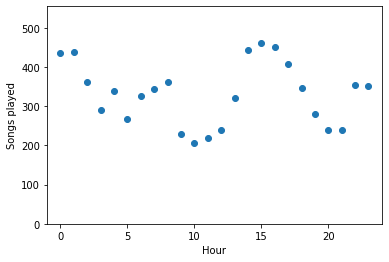

In [47]:
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played")

## **Drop Rows with Missing Values**

In [49]:
user_log_valid = user_log.dropna(how = "any", subset = ["userId", "sessionId"])

In [50]:
user_log_valid.count()

9596

In [51]:
user_log.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [52]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [53]:
user_log_valid.count()

9260

## **Users Downgrade Their Accounts**

Find when users downgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.

In [54]:
user_log_valid.filter("page = 'Submit Downgrade'").show()

+---------------+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|_corrupt_record|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+---------------+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|           null|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  11|
+---------------+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+----

In [55]:
user_log.select(["userId", "firstname", "page", "level", "song"]).where(user_log.userId == "1138").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [56]:
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [58]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [59]:
user_log_valid.head()

Row(_corrupt_record=None, artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22', downgraded=0)

In [60]:
from pyspark.sql import Window

UNBOUNDED PRECEDING - the first row of the partition

In [61]:
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [62]:
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgraded").over(windowval))

In [63]:
user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase"]).where(user_log.userId == "1138").sort("ts").collect()

[Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firs

## **Question 1**
Which page did user id "" (empty string) NOT visit?

In [66]:
user_log.select(["page"]).where(user_log.userId == "").dropDuplicates().collect()

[Row(page='Home'), Row(page='About'), Row(page='Login'), Row(page='Help')]

In [151]:
# filter for users with blank user id
blank_pages = user_log.filter(user_log.userId == '') \
    .select(['page']) \
    .alias('blank_pages') \
    .dropDuplicates()
    
# get a list of possible pages that could be visited
all_pages = user_log.select('page').dropDuplicates()

# find values in all_pages that are not in blank_pages
# these are the pages that the blank user did not go to
for row in set(all_pages.collect()) - set(blank_pages.collect()):
    print(row.page)

Submit Downgrade
NextSong
None
Submit Upgrade
Error
Downgrade
Save Settings
Upgrade
Settings
Logout


## **Question 3**
How many female users do we have in the data set?

In [76]:
user_log.select(['userId']).where(user_log.gender == 'F').dropDuplicates().count()

460

## **Question 4**
How many songs were played from the most played artist?

In [79]:
user_log_valid.select(["userId", "artist"]).where(user_log.artist != '').dropDuplicates().groupby(user_log_valid.artist).count().sort(desc("count")).show()

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|            Coldplay|   60|
|       Kings Of Leon|   54|
|Florence + The Ma...|   48|
|      The Black Keys|   39|
|       Dwight Yoakam|   39|
|       Justin Bieber|   35|
|         OneRepublic|   32|
|        Jack Johnson|   31|
|                Muse|   31|
|        Taylor Swift|   28|
|           Radiohead|   28|
|          Nickelback|   27|
|Barry Tuckwell/Ac...|   27|
|           Metallica|   26|
|           Daft Punk|   23|
|Red Hot Chili Pep...|   23|
|               Train|   23|
|          John Mayer|   22|
|         The Killers|   22|
|            Harmonia|   22|
+--------------------+-----+
only showing top 20 rows



In [77]:
user_log.select(["song", "artist"]).where(user_log.artist == "Coldplay").count()

83

## **Question 5**

How many songs do users listen to on average between visiting our home page? Please round your answer to the closest integer.

In [120]:
from pyspark.sql import functions as f

In [121]:
function = udf(lambda ishome : int(ishome == 'Home'), IntegerType())

user_window = Window.partitionBy('userId').orderBy(desc('ts')).rangeBetween(Window.unboundedPreceding, 0)

cusum = user_log.filter((user_log.page == 'NextSong') | (user_log.page == 'Home')) \
    .select('userID', 'page', 'ts') \
    .withColumn('homevisit', f.col('page')) \
    .withColumn('period', Fsum('homevisit').over(user_window))

In [122]:
cusum.show()

+------+----+-------------+---------+------+
|userID|page|           ts|homevisit|period|
+------+----+-------------+---------+------+
|      |Home|1513846494284|     Home|  null|
|      |Home|1513845761284|     Home|  null|
|      |Home|1513845132284|     Home|  null|
|      |Home|1513845055284|     Home|  null|
|      |Home|1513844251284|     Home|  null|
|      |Home|1513844026284|     Home|  null|
|      |Home|1513843602284|     Home|  null|
|      |Home|1513843098284|     Home|  null|
|      |Home|1513842367284|     Home|  null|
|      |Home|1513841138284|     Home|  null|
|      |Home|1513841121284|     Home|  null|
|      |Home|1513839824284|     Home|  null|
|      |Home|1513838865284|     Home|  null|
|      |Home|1513838857284|     Home|  null|
|      |Home|1513838835284|     Home|  null|
|      |Home|1513838141284|     Home|  null|
|      |Home|1513838110284|     Home|  null|
|      |Home|1513836104284|     Home|  null|
|      |Home|1513835948284|     Home|  null|
|      |Ho

In [123]:
cusum.filter((cusum.page == 'NextSong')) \
    .groupBy('userId', 'period') \
    .agg({'period':'count'}) \
    .agg({'count(period)':'avg'}).show()

+------------------+
|avg(count(period))|
+------------------+
|               0.0|
+------------------+



# **Spark SQL**

* [Spark SQL built-in functions](https://spark.apache.org/docs/latest/api/sql/index.html)
* [Spark SQL guide](https://spark.apache.org/docs/latest/sql-getting-started.html)

Create a View And Run Queries

In [128]:
path = "drive/MyDrive/Github/spark/data/sparkify_log_small.json"
user_log = spark.read.json(path)

In [129]:
user_log.createOrReplaceTempView("user_log_table")

In [130]:
spark.sql("SELECT * FROM user_log_table LIMIT 2").show()

+---------------+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|_corrupt_record|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+---------------+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|           null|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|           null|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195

In [131]:
spark.sql('''
          SELECT * 
          FROM user_log_table 
          LIMIT 2
          '''
          ).show()

+---------------+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|_corrupt_record|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+---------------+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|           null|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|           null|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195

In [132]:
spark.sql('''
          SELECT COUNT(*) 
          FROM user_log_table 
          '''
          ).show()

+--------+
|count(1)|
+--------+
|   10000|
+--------+



In [133]:
spark.sql('''
          SELECT userID, firstname, page, song
          FROM user_log_table 
          WHERE userID == '1046'
          '''
          ).collect()

[Row(userID='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userID='1046', firstname='Kenneth', page='Home', song=None),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userID='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userID='1046', firstname='Kenneth'

In [134]:
spark.sql('''
          SELECT DISTINCT page
          FROM user_log_table 
          ORDER BY page ASC
          '''
          ).show()

+----------------+
|            page|
+----------------+
|            null|
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



## **User Defined Functions**

In [135]:
spark.udf.register("get_hour", lambda x: int(datetime.datetime.fromtimestamp(x / 1000.0).hour))

<function __main__.<lambda>>

In [137]:
spark.sql('''
          SELECT *, get_hour(ts) AS hour
          FROM user_log_table
          WHERE ts is not NULL 
          LIMIT 1
          '''
          ).collect()

[Row(_corrupt_record=None, artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22')]

In [138]:
songs_in_hour = spark.sql('''
          SELECT get_hour(ts) AS hour, COUNT(*) as plays_per_hour
          FROM user_log_table
          WHERE page = "NextSong"
          GROUP BY hour
          ORDER BY cast(hour as int) ASC
          '''
          )

In [139]:
songs_in_hour.show()

+----+--------------+
|hour|plays_per_hour|
+----+--------------+
|   0|           436|
|   1|           438|
|   2|           361|
|   3|           290|
|   4|           338|
|   5|           266|
|   6|           327|
|   7|           343|
|   8|           361|
|   9|           229|
|  10|           205|
|  11|           218|
|  12|           238|
|  13|           322|
|  14|           442|
|  15|           462|
|  16|           451|
|  17|           408|
|  18|           345|
|  19|           280|
+----+--------------+
only showing top 20 rows



## **Converting Results to Pandas**

In [140]:
songs_in_hour_pd = songs_in_hour.toPandas()

In [141]:
print(songs_in_hour_pd)

   hour  plays_per_hour
0     0             436
1     1             438
2     2             361
3     3             290
4     4             338
5     5             266
6     6             327
7     7             343
8     8             361
9     9             229
10   10             205
11   11             218
12   12             238
13   13             322
14   14             442
15   15             462
16   16             451
17   17             408
18   18             345
19   19             280
20   20             238
21   21             239
22   22             355
23   23             351


## **Question 1**
Which page did user id ""(empty string) NOT visit?

In [142]:
blank_pg = spark.sql('''
          SELECT distinct page
          FROM user_log_table
          WHERE page NOT IN (SELECT distinct page
          FROM user_log_table 
          WHERE userId == '')
          '''
          ).show()

+----------------+
|            page|
+----------------+
|Submit Downgrade|
|       Downgrade|
|          Logout|
|   Save Settings|
|        Settings|
|        NextSong|
|         Upgrade|
|           Error|
|  Submit Upgrade|
+----------------+



## **Question 3**
How many female users do we have in the data set?

In [144]:
spark.sql('''
          SELECT count(distinct userId)
          FROM user_log_table 
          WHERE gender == 'F'
          '''
          ).collect()

[Row(count(DISTINCT userId)=460)]

## **Question 4**
How many songs were played from the most played artist?

In [145]:
spark.sql('''
          SELECT count(Song) as total
          FROM user_log_table 
          GROUP BY Artist
          ORDER BY total desc
          '''
          ).show(1)

+-----+
|total|
+-----+
|   83|
+-----+
only showing top 1 row



## **Question 5 (challenge)**
How many songs do users listen to on average between visiting our home page? Please round your answer to the closest integer.

In [154]:
# SELECT CASE WHEN 1 > 0 THEN 1 WHEN 2 > 0 THEN 2.0 ELSE 1.2 END;
is_home = spark.sql("SELECT userId, page, ts, CASE WHEN page = 'Home' THEN 1 ELSE 0 END AS is_home FROM user_log_table \
            WHERE (page = 'NextSong') or (page = 'Home') \
            ")

# keep the results in a new view
is_home.createOrReplaceTempView("is_home_table")

# find the cumulative sum over the is_home column
cumulative_sum = spark.sql("SELECT *, SUM(is_home) OVER \
    (PARTITION BY userID ORDER BY ts DESC ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS period \
    FROM is_home_table")

# keep the results in a view
cumulative_sum.createOrReplaceTempView("period_table")

# find the average count for NextSong
spark.sql("SELECT AVG(count_results) FROM \
          (SELECT COUNT(*) AS count_results FROM period_table \
GROUP BY userID, period, page HAVING page = 'NextSong') AS counts").show()

+------------------+
|avg(count_results)|
+------------------+
| 6.674789915966387|
+------------------+

